First Part of HW5 up until 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def naive_interpolation(x, y):
    '''
        x: list of x values
        y: list of y values
        co_eff: list of coefficients of the polynomial
    '''
    #set up the Vandermonde matrix
    n = len(x) #get the length of x values
    V = np.zeros((n, n)) #Initialize the van
    # vendermonde matrix. np.zeros(n, n) => n x n matrix with zeros!
    for i in range(n):
        for j in range(n):
            V[i][j] = x[i] ** j #fill in the vandermonde matrix with x values raised to the power of j
    co_eff = np.linalg.solve(V, y) #calculate the coefficients. (ax = b) using numpy linear algebra solver
    return co_eff

In [20]:
def my_poly_eval(a, x):
    '''
        a: coefficients of the polynomial
        x: point to evaluate
    '''
    n = len(a) #get the length of the coefficients
    y = 0
    for i in range(n):
        y += a[i] * (x ** i) #evaluate the polynomial
    return y

In [21]:
def my_langrange(x, y, x_val):
    '''
        x: list of x values
        y: list of y values
        x_val: point to evaluate
    '''
    n = len(x) #get the length of x values
    y_val = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_val - x[j]) / (x[i] - x[j]) #calculate the lagrange polynomial
        y_val += l * y[i] #evaluate the lagrange polynomial
    return y_val

In [22]:
def newton_divided_difference(x, y):
    '''
    Calculates the coefficients of the Newton polynomial using divided differences.

    x: list of x values
    y: list of y values
    Returns: list of coefficients of the polynomial
    '''
    n = len(x)
    F = np.zeros((n, n))
    for i in range(n):
        F[i][0] = y[i]
    for i in range(1, n):
        for j in range(1, i + 1):
            F[i][j] = (F[i][j - 1] - F[i - 1][j - 1]) / (x[i] - x[i - j])
    co_eff = [F[i][i] for i in range(n)]
    return co_eff


def newton_polynomial(co_eff, x_values, x):
    '''
    Evaluates the Newton polynomial at a given x.

    co_eff: coefficients of the Newton polynomial
    x_values: original x values used to generate the polynomial
    x: point at which to evaluate the polynomial
    Returns: y value at the given x
    '''
    n = len(x_values)
    result = co_eff[0]
    for i in range(1, n):
        term = co_eff[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

In [23]:
#HW3 Problem_5
#Naive metod to fit the data
x_points = [0, 7.5, 15]
y_points = [-x ** 2 + 3 * x for x in x_points]
naive_co_eff = naive_interpolation(x_points, y_points)

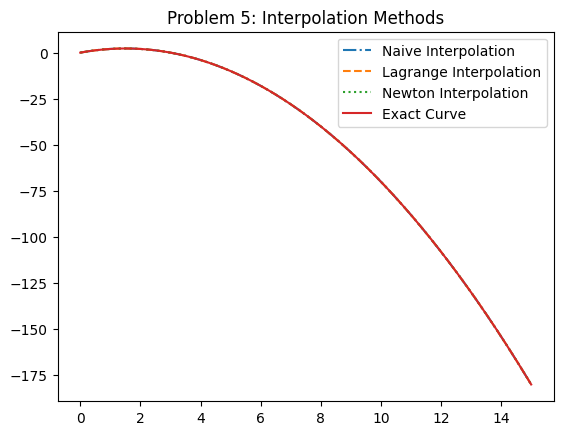

<Figure size 640x480 with 0 Axes>

In [24]:
x_evaluation = np.arange(0, 15.05, 0.05)
y_evaluation = np.array([-x ** 2 + 3 * x for x in x_evaluation])
y_naive_evaluation = [my_poly_eval(naive_co_eff, x) for x in x_evaluation]

#lagrange method to fit the data
lagrange_y_points = [my_langrange(x_points, y_points, x) for x in x_evaluation]

#Newton's divided difference method to fit the data
newton_co_eff = newton_divided_difference(x_points, y_points)
# newton_y_eval_points = [my_poly_eval(newton_co_eff, x) for x in x_points]
newton_y_eval_points = [newton_polynomial(newton_co_eff, x_points, x) for x in x_evaluation]

plt.title('Problem 5: Interpolation Methods')
plt.plot(x_evaluation, y_naive_evaluation, label='Naive Interpolation', linestyle='-.')
plt.plot(x_evaluation, lagrange_y_points, label='Lagrange Interpolation', linestyle='--')
plt.plot(x_evaluation, newton_y_eval_points, label='Newton Interpolation', linestyle=':')
plt.plot(x_evaluation, y_evaluation, label='Exact Curve')
plt.legend()
plt.show()
plt.savefig('problem5_1.png')
plt.clf()

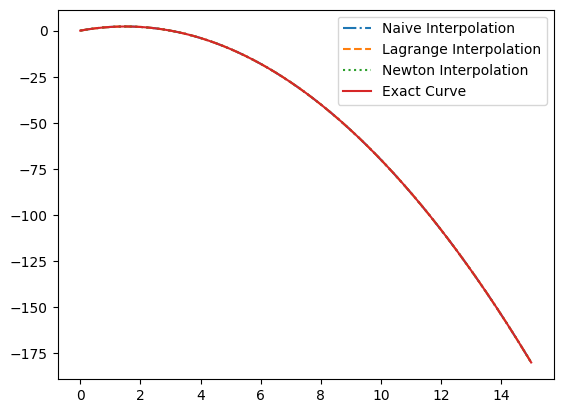

<Figure size 640x480 with 0 Axes>

In [25]:
#How about more points?

#number of points: 5
x_points_5 = [0, 3, 6, 12, 15]
y_points_5 = [-x ** 2 + 3 * x for x in x_points_5]

naive_co_eff_5 = naive_interpolation(x_points_5, y_points_5)
naive_y_eval_points_5 = [my_poly_eval(naive_co_eff_5, x) for x in x_evaluation]
lagrange_y_points_5 = [my_langrange(x_points_5, y_points_5, x) for x in x_evaluation]
newton_co_eff_5 = newton_divided_difference(x_points_5, y_points_5)
# newton_y_eval_points_5 = [my_poly_eval(newton_co_eff_5, x) for x in x_points_5]
newton_y_eval_points_5 = [newton_polynomial(newton_co_eff_5, x_points_5, x) for x in x_evaluation]
plt.plot(x_evaluation, naive_y_eval_points_5, label='Naive Interpolation', linestyle='-.')
plt.plot(x_evaluation, lagrange_y_points_5, label='Lagrange Interpolation', linestyle='--')
plt.plot(x_evaluation, newton_y_eval_points_5, label='Newton Interpolation', linestyle=':')
plt.plot(x_evaluation, y_evaluation, label='Exact Curve', linestyle='-')
plt.legend()
plt.show()
plt.savefig('problem_5-5points.png')
plt.clf()